In [203]:
import json
import matplotlib.pyplot as plt
from scipy.stats import chi2
import pandas as pd
import networkx as nx
import numpy as np
import os

# Analysis of the competition network
1. Load data
2. give the cluster of nodes
3. plot the network
4. caculate the competition of netork across cluster

In [204]:
USE_SIMPLE_DATA = False

In [205]:
# change the path 
path = "/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes"
os.chdir(path)


In [206]:
# load the data
departmentDict = {}
with open("./rawData/cross/university.json") as f:
    universityDict = json.load(f)
for Ukey, Uvalue in universityDict.items():
    with open(f"./rawData/cross/{Ukey}.json") as f:
        department = json.load(f)
    for Skey, Svalue in department.items():
        departmentDict[f"{Ukey}_{Skey}"] = Svalue



In [207]:
# transfer to networkx Graph
with open("./rawData/cross/students.json") as f:
    studentDict = json.load(f)
cluster = dict()
G = nx.Graph()
it = 0
for key, val in departmentDict.items():
    G.add_node(val, cnname=key)
for dep in studentDict:
    for head, tail in dep.items():
        for link, weight  in tail.items():
            G.add_edge(head, link, weight=weight)

In [208]:
# load the cluster data set
os.chdir("/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes")
with open(f"./processedData/{'simplify_tsneCluster.csv' if USE_SIMPLE_DATA else 'raw_tsneCluster.csv'}") as f:
    clusterData = pd.read_csv(f)
clusterMap = {f"{row['學系代碼']:06d}": row['cluster'] for idx, row in clusterData.iterrows()}

In [209]:
clusterData.value_counts('cluster')

cluster
1    517
2    425
7    340
4    279
5    248
3    238
6    107
Name: count, dtype: int64

Note:  cluster 8 means other

In [210]:
# add cluster to the graph
for node in G.nodes:
    node_ = node.replace("check_", "").replace("_NO_1_109_0_3.html", "").replace("music_dep_", "").replace(
        "_NO_0_109_0_3.html", "").replace("_NO_1_109_1_3.html", "")
    try:
        G.nodes[node]['cluster'] = clusterMap[node_]
    except:
        G.nodes[node]['cluster'] = 8
    try:
        G.nodes[node]['code'] = node_
    except:
        G.nodes[node]['code'] = None

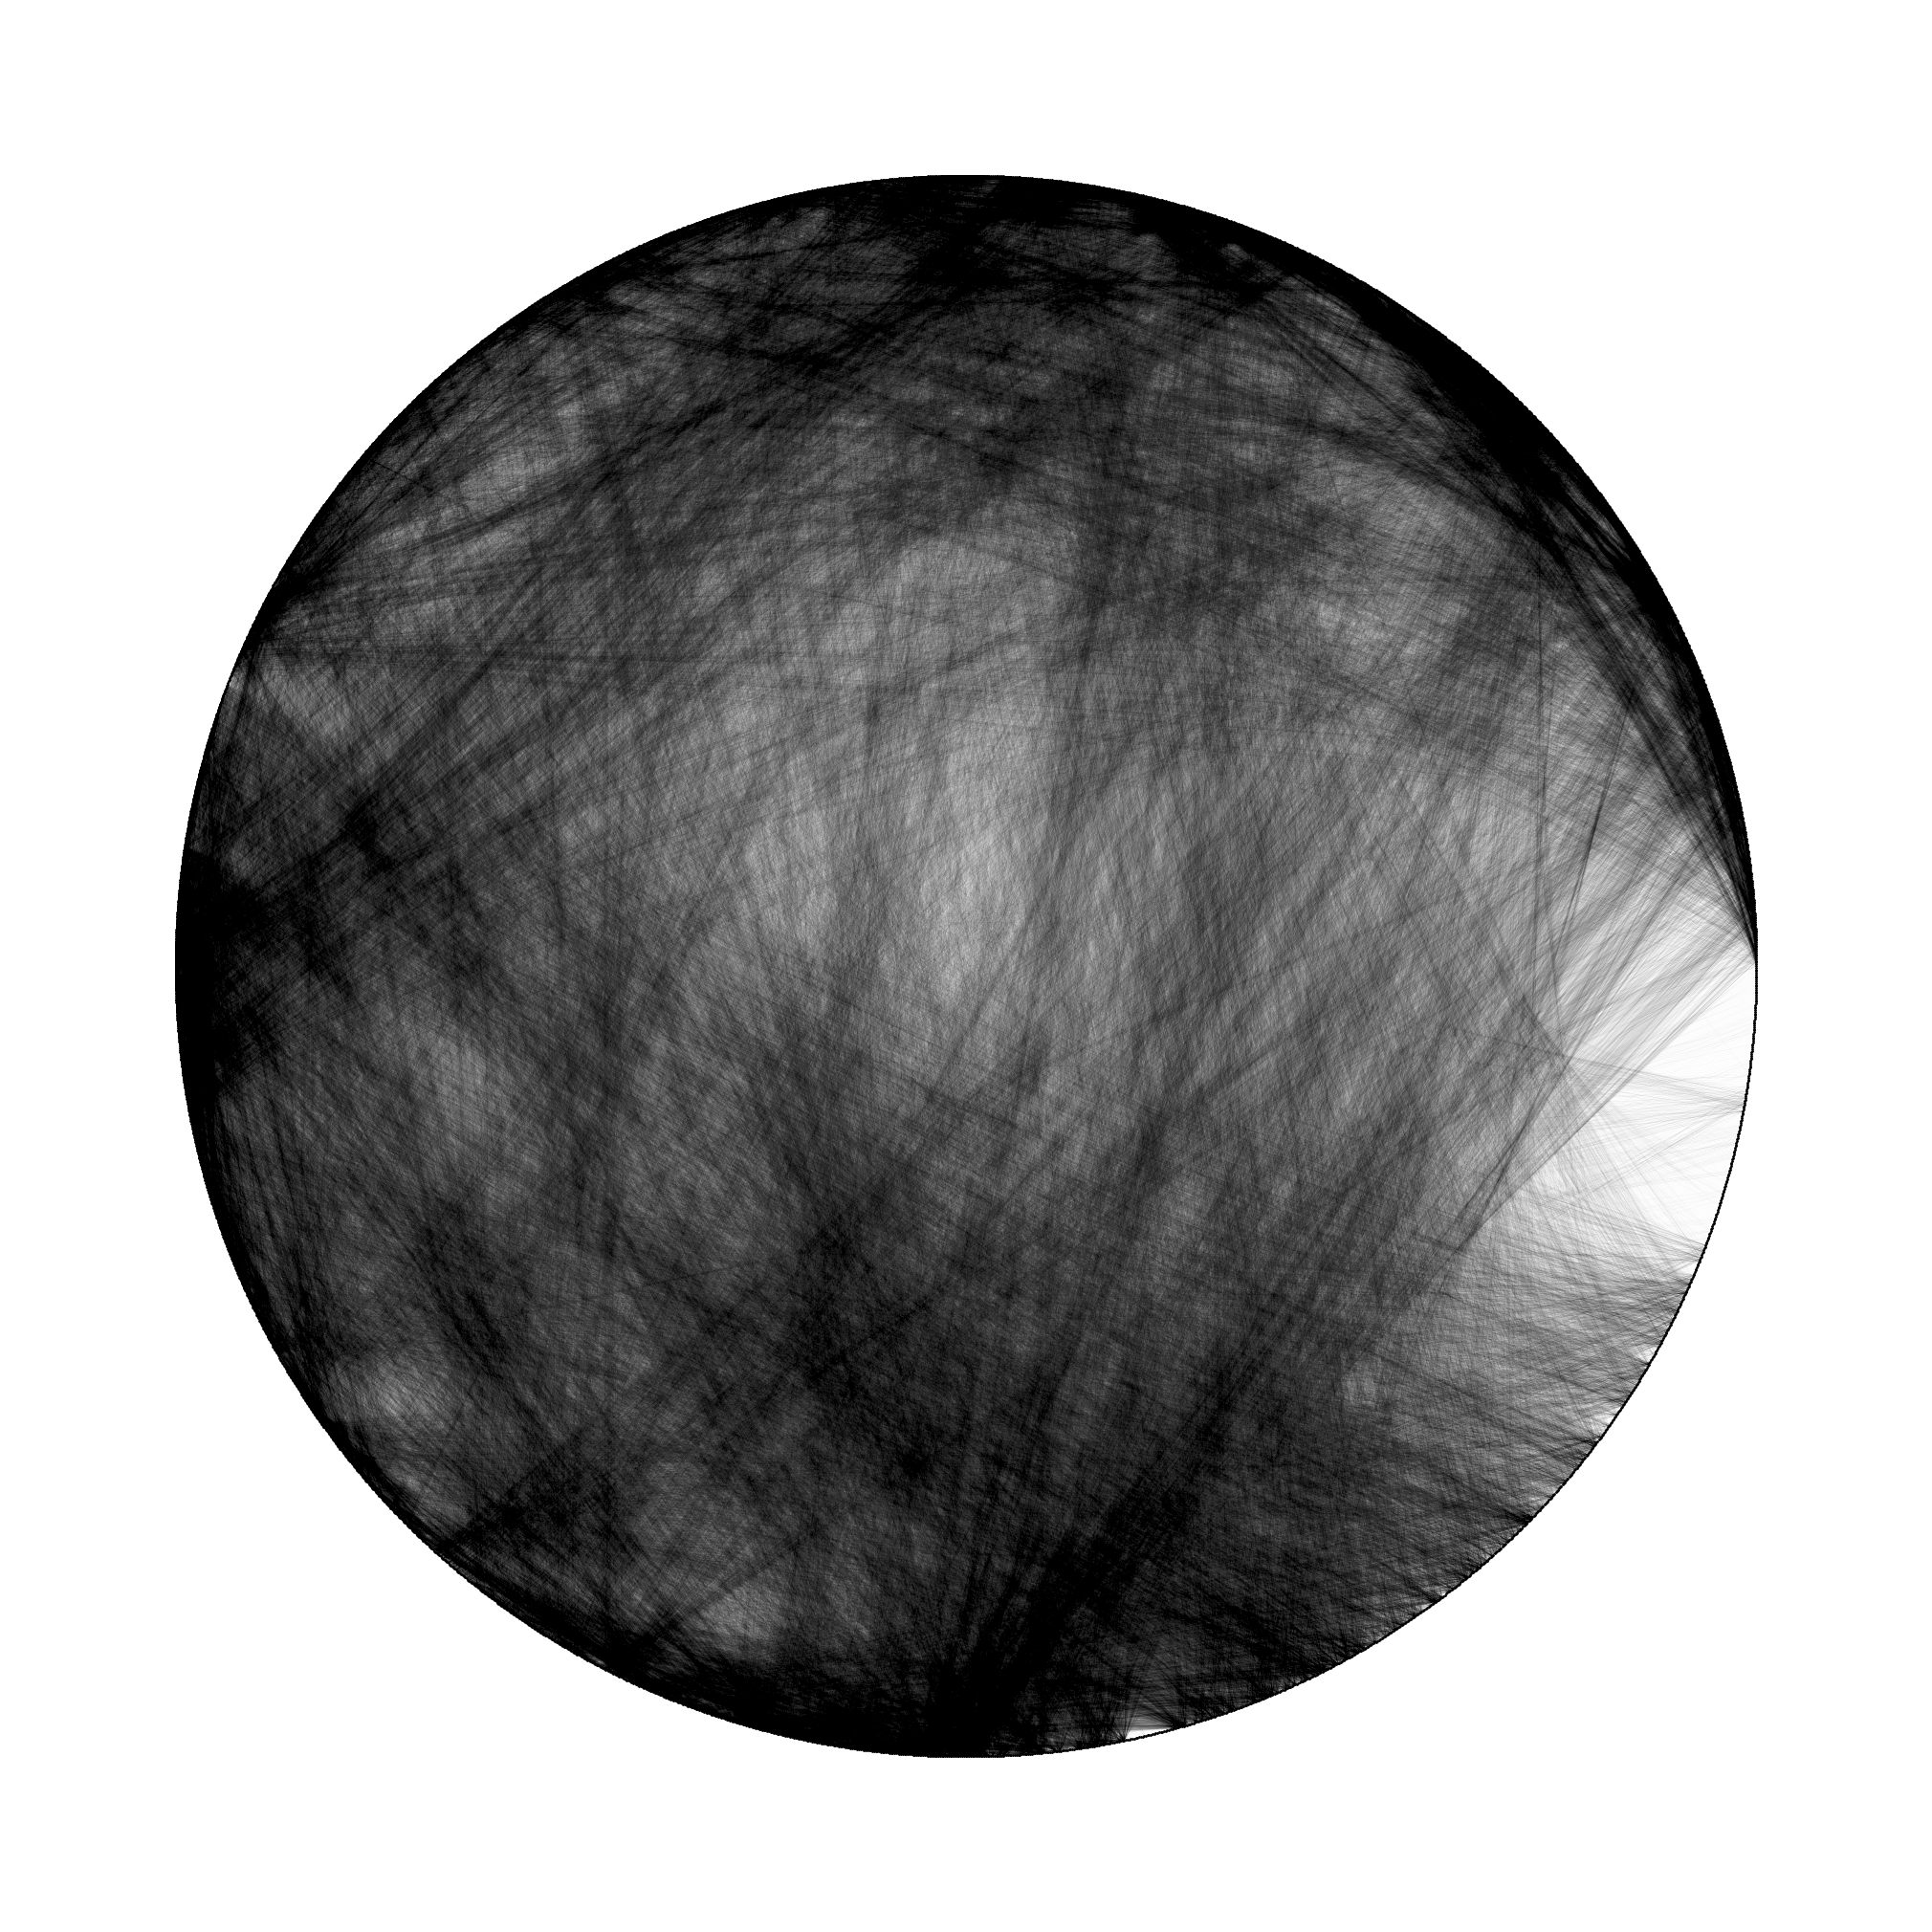

In [80]:
# draw the network
plt.figure(figsize=(20, 20))

pos = nx.circular_layout(G)

options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 0.01
}
# Draw custom labels
nx.draw(G, with_labels=False, pos=pos, **options)

plt.savefig(f"./pics/{'simpCompetitionNetwork.png' if USE_SIMPLE_DATA else 'rawCompetitionNetwork.png'}")

In [81]:
print(f"nodes : {G.number_of_nodes()}, edges : {G.size()}")

nodes : 2923, edges : 153300


001012
001022
001032
001042
001052
001062
001072
001082
001092
001102
001112
001122
001132
001142
001152
001162
001172
001182
001192
001202
001212
001222
001232
001242
001252
001262
001272
001282
001292
001302
001312
001322
001332
001342
001352
001362
001372
001382
001392
001402
001412
001422
001432
001442
001452
001462
001472
001482
001492
001502
001512
001522
001532
001542
001552
001562
001572
001582
001592
001602
001612
001622
001632
001642
001652
001662
001672
001682
001692
001702
001712
002012
002022
002032
002042
002052
002062
002072
002082
002092
002102
002112
002122
002132
002142
002152
002162
002172
002182
002192
002202
002212
002222
002232
002242
002252
002262
002272
002282
002292
002302
002312
002322
002332
002342
002352
002362
002372
002382
002392
002402
002412
002422
003012
003022
003032
003042
003052
003062
003072
003082
003092
003102
003112
003122
003132
003142
003152
003162
003172
003182
003192
003202
003212
003222
003232
003242
003252
003262
003272
003282
003292
003302

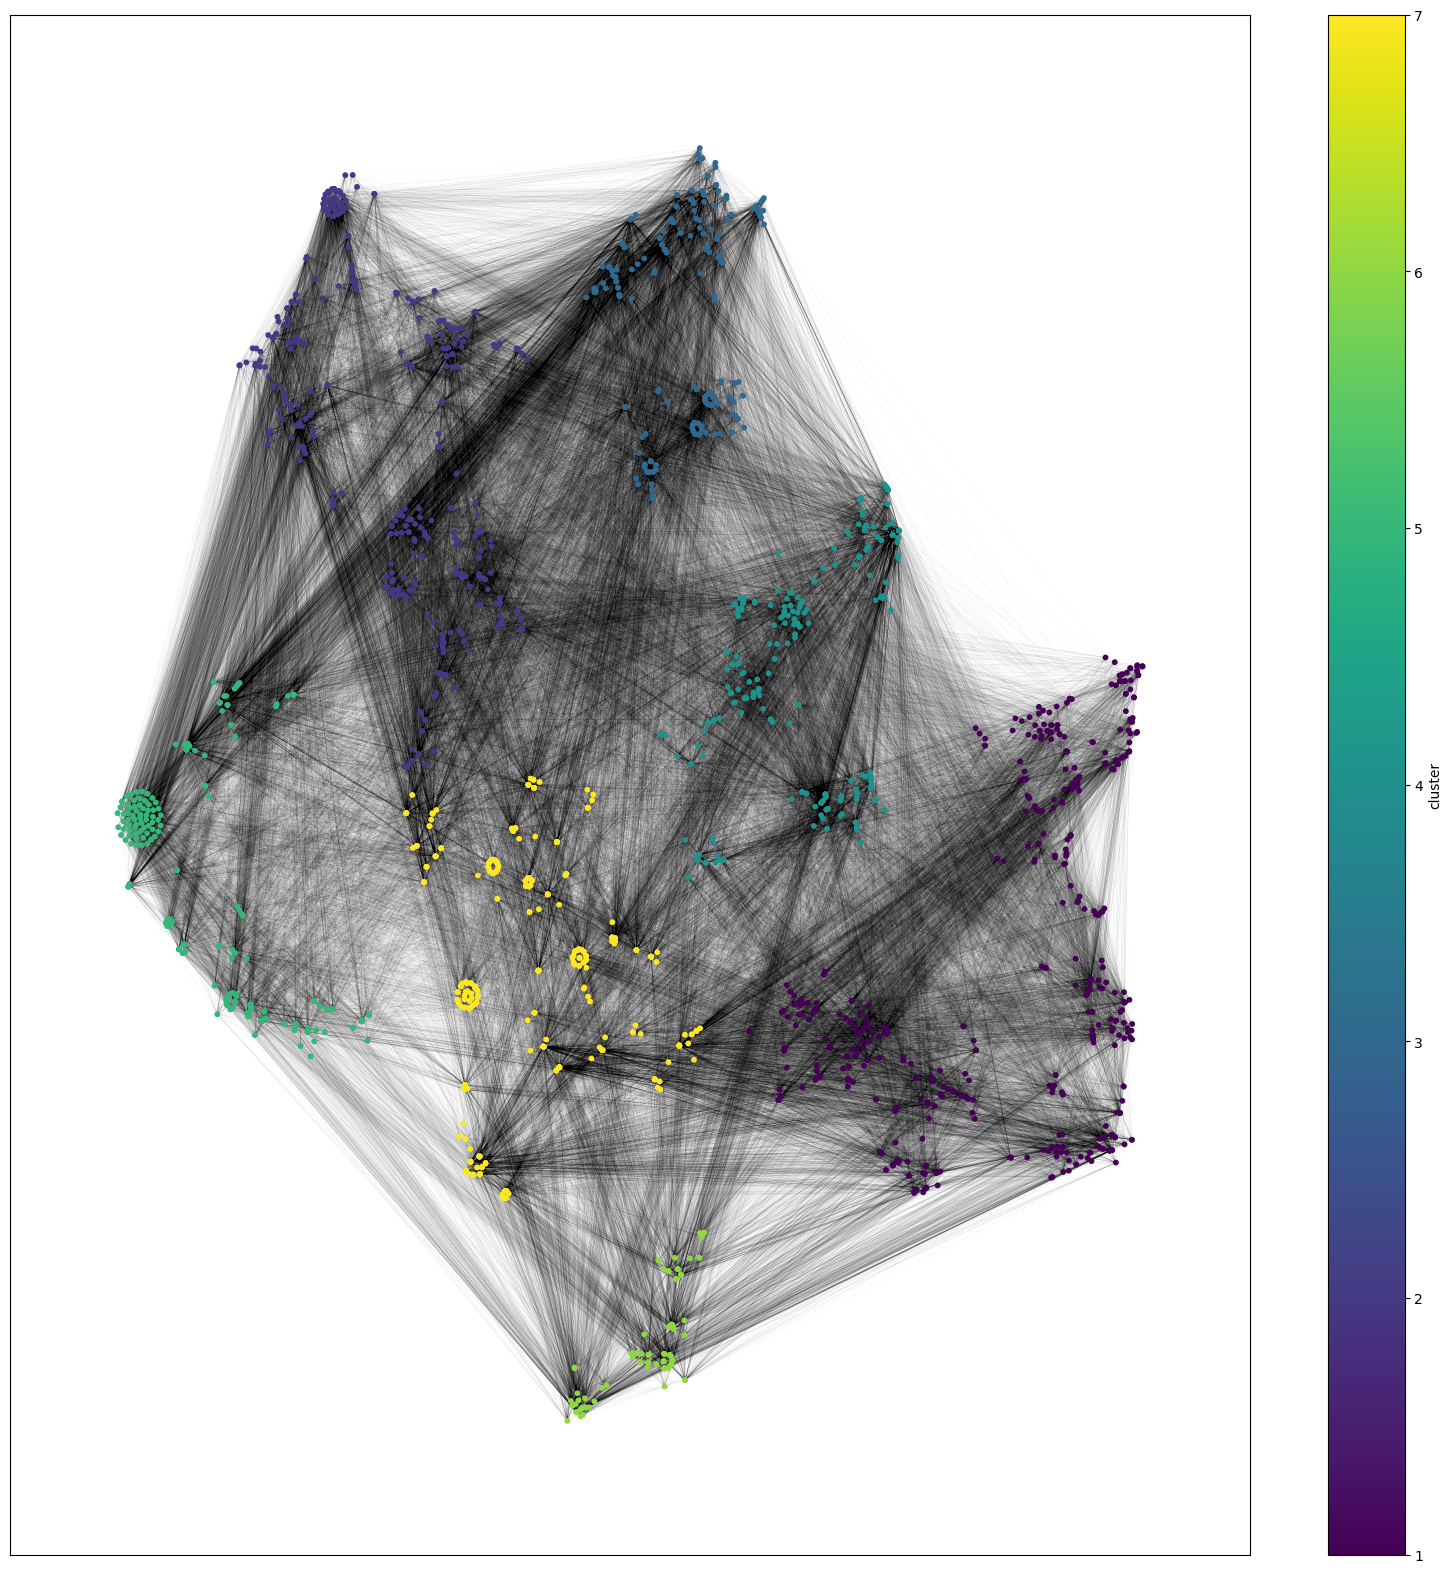

In [82]:
# draw the network with cluster and pos
Gtemp = G.copy()
pos = nx.circular_layout(Gtemp)
rmlist = []
for node in Gtemp.nodes:
    node_ = node.replace("check_", "").replace("_NO_1_109_0_3.html", "").replace("music_dep_", "").replace(
        "_NO_0_109_0_3.html", "").replace("_NO_1_109_1_3.html", "")
    print(node_)
    try:
        pos.update({node: np.array([clusterData.loc[clusterData['學系代碼'] == int(node_), 'tsnepos1'].values[0],
                                    clusterData.loc[clusterData['學系代碼'] == int(node_), 'tsnepos2'].values[0]])})
        Gtemp.nodes[node]['posx'] = clusterData.loc[clusterData['學系代碼'] == int(node_), 'tsnepos1'].values[0]
        Gtemp.nodes[node]['posy'] = clusterData.loc[clusterData['學系代碼'] == int(node_), 'tsnepos2'].values[0]
    except:
        rmlist.append(node)
for node in rmlist:
    Gtemp.remove_node(node)

plt.figure(figsize=(20, 20))
options = {
    'node_color': [Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes],
    'node_size': 10,
    'width': 0.01,
    'cmap': 'tab10',
    'labels': {node: Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes}
}
node_options = {
    'node_color': [Gtemp.nodes[node]['cluster'] for node in Gtemp.nodes],
    'node_size': 10,
    'cmap': 'viridis'
}
edge_options = {
    'width': 0.01
}

# Draw custom labels
linkG = nx.draw_networkx_nodes(Gtemp, pos=pos, **node_options)
plt.colorbar(linkG,
             label='cluster')
nx.draw_networkx_edges(Gtemp, pos=pos, **edge_options)
plt.savefig(f"./pics/{'simpCompetitionNetworkCluster.png' if USE_SIMPLE_DATA else 'rawCompetitionNetworkCluster.png'}",
            dpi=300)
#nx.write_gexf(Gtemp,f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_competitionNetwork.gexf")

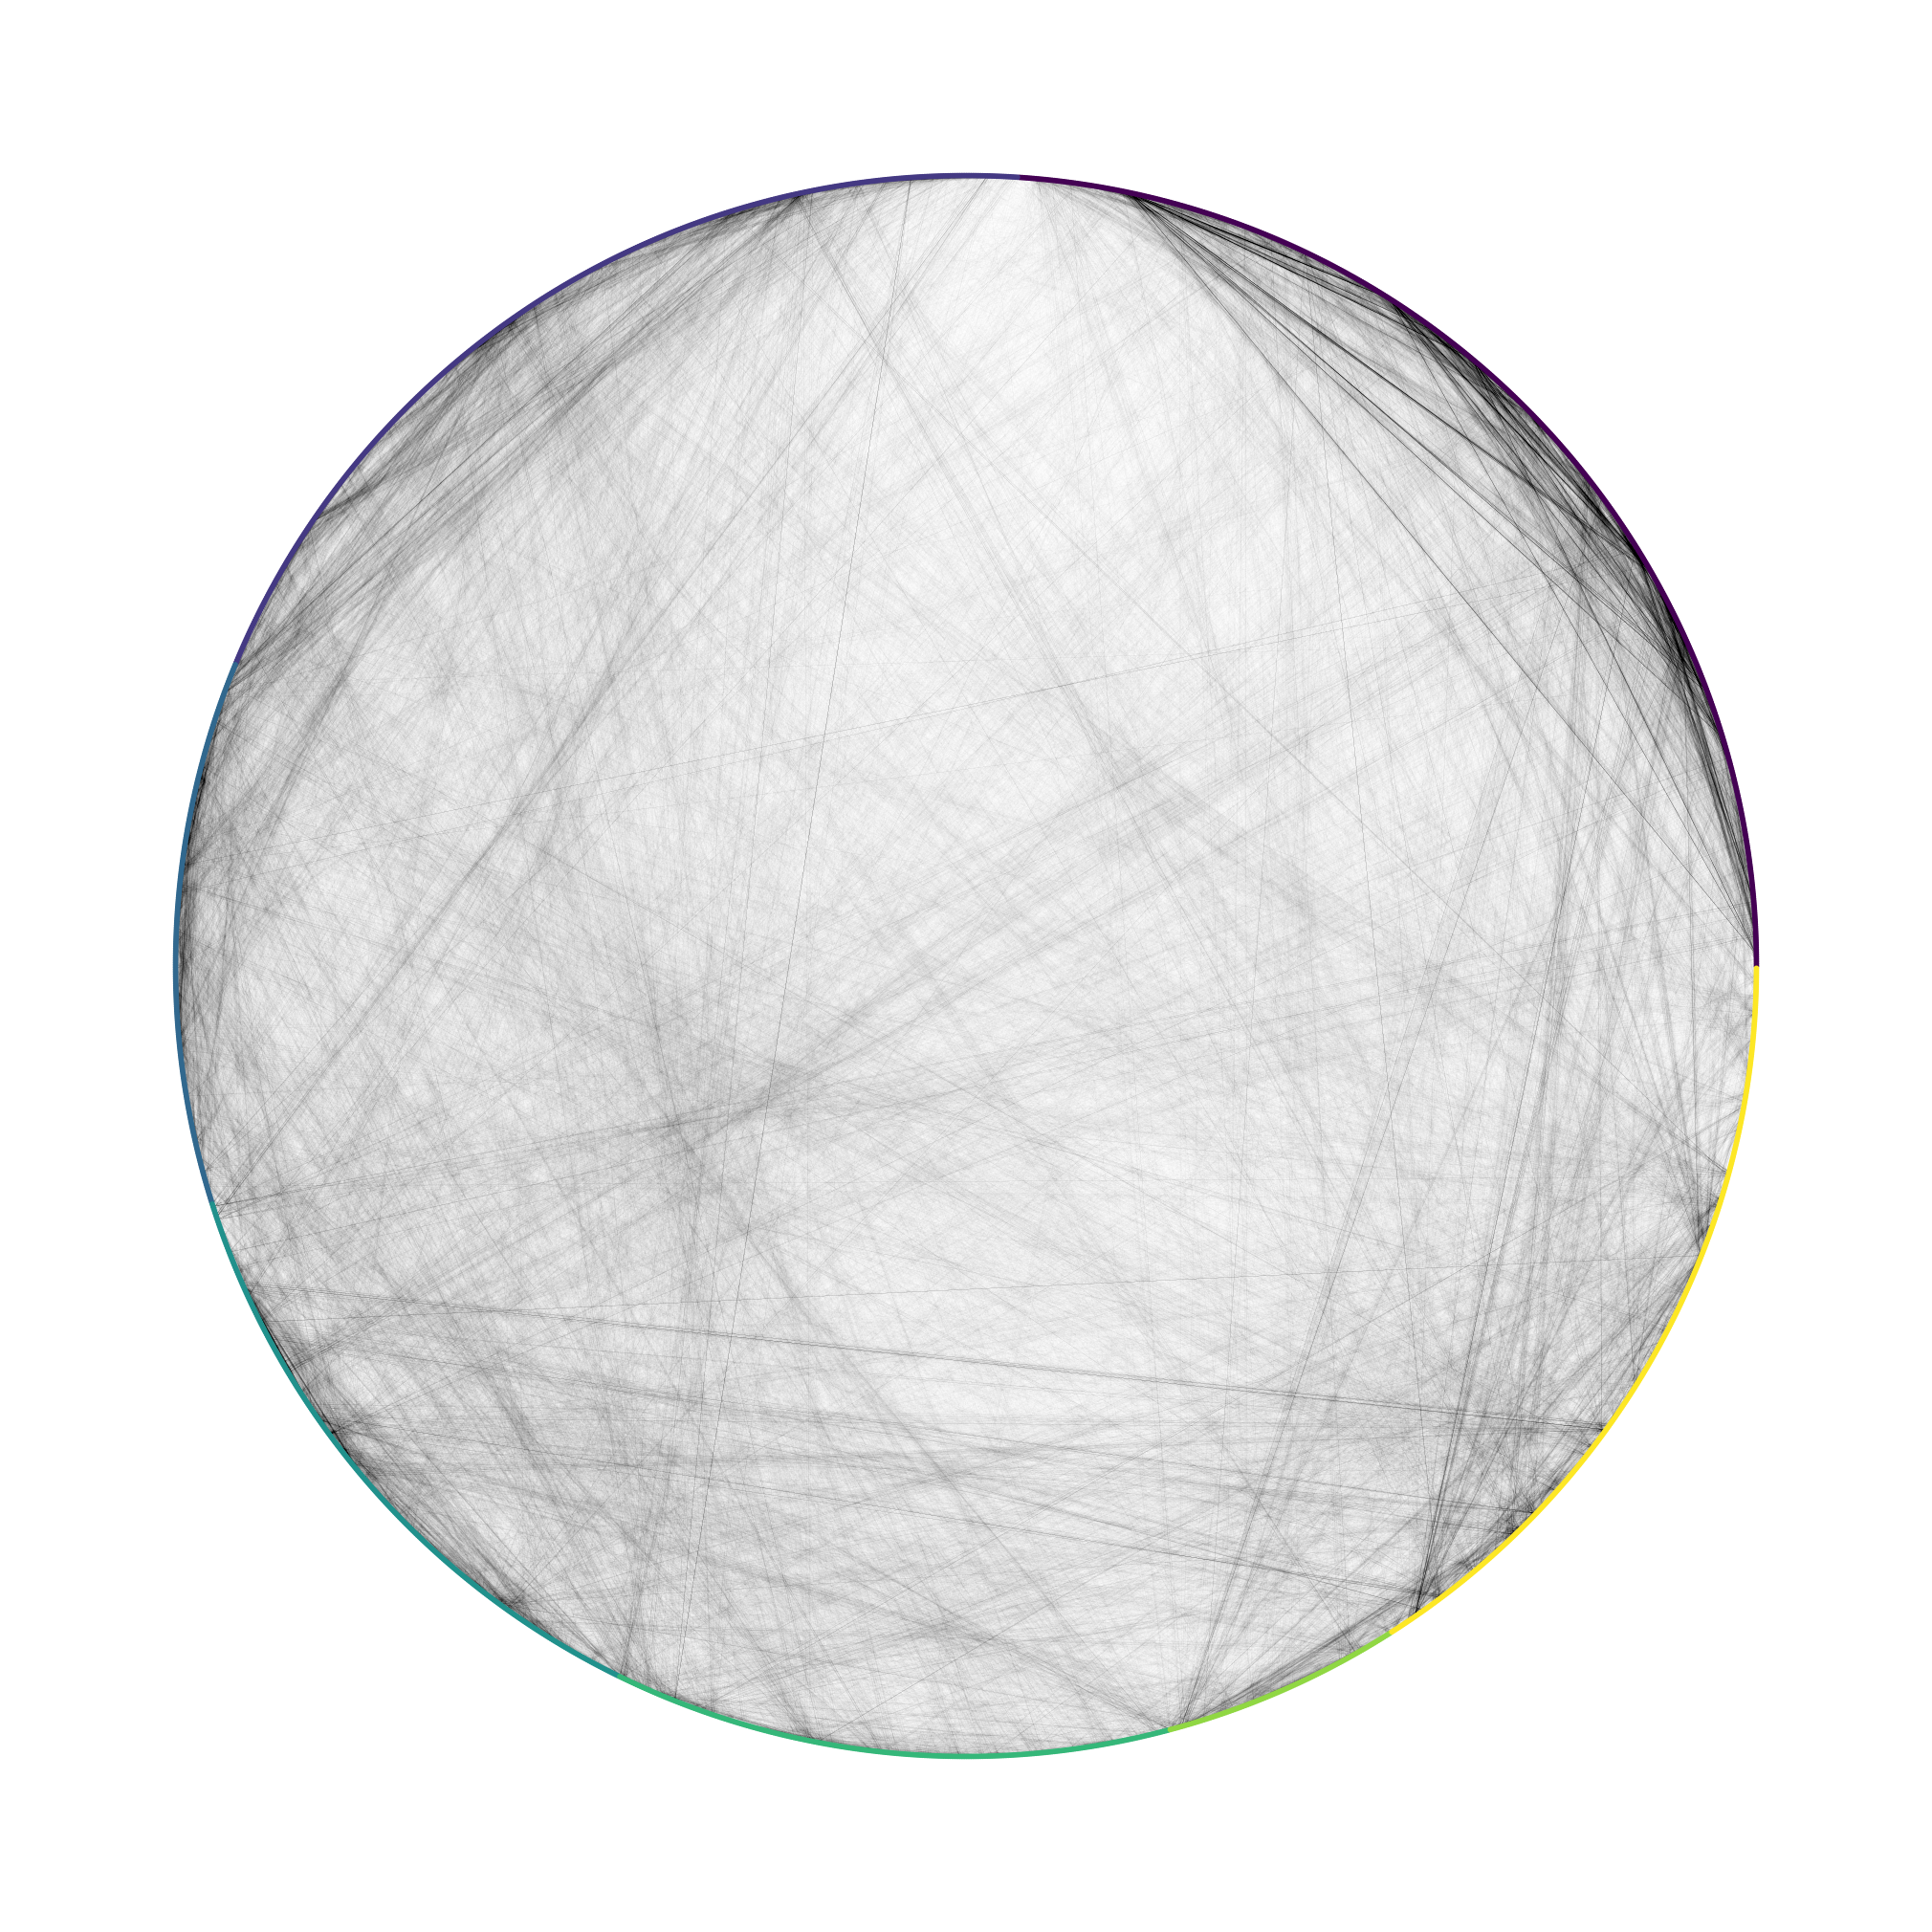

In [83]:
H = nx.Graph()

for clust in range(1, 8):
    for node in Gtemp.nodes:
        if Gtemp.nodes[node]['cluster'] == clust:
            H.add_node(node, cluster=clust)
for edg in Gtemp.edges:
    H.add_edge(edg[0], edg[1], weight=Gtemp.edges[edg]['weight'])

plt.figure(figsize=(20, 20))

pos = nx.circular_layout(H)

options = {
    'node_color': [H.nodes[node]['cluster'] for node in H.nodes],
    'node_size': 10,
    'width': [H.edges[edge]['weight'] / 1000 for edge in H.edges],
}
# Draw custom labels
nx.draw(H, with_labels=False, pos=pos, **options)

plt.savefig(f"./pics/{'simpCompetitionNetwork.png' if USE_SIMPLE_DATA else 'rawCompetitionNetwork.png'}")

# average connection strength between cluster

In [84]:
# caculate the cluster transfer matrix
clusterTransfer = [[[] for i in range(8)] for j in range(7)]
for node in G.nodes():
    sumofconnection = 0
    temp = [[] for _ in range(8)]
    if int(G.nodes[node]['cluster']) != 8:
        for neighbor in G.neighbors(node):
            sumofconnection += G.edges[node, neighbor]['weight']
            temp[G.nodes[neighbor]['cluster'] - 1].append(G.edges[node, neighbor]['weight'])
        for i in range(8):
            if len(temp[i]) == 0:
                temp[i] = 0
            temp[i] = np.nansum(temp[i])
            if temp[i] not in [np.nan, np.inf, -np.inf]:
                clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i])


# chi test

In [85]:
clusterMatrix = np.zeros((7, 8))
for i in range(7):
    for j in range(8):
        clusterMatrix[i][j] = np.nansum(clusterTransfer[i][j])

# chi test
from scipy.stats import chi2_contingency

chi2_val, p, dof, ex = chi2_contingency(clusterMatrix)
print(f"chi2: {chi2_val}, p: {p}, dof: {dof}")

chi2: 418803.8281536637, p: 0.0, dof: 42


<Figure size 3000x3000 with 0 Axes>

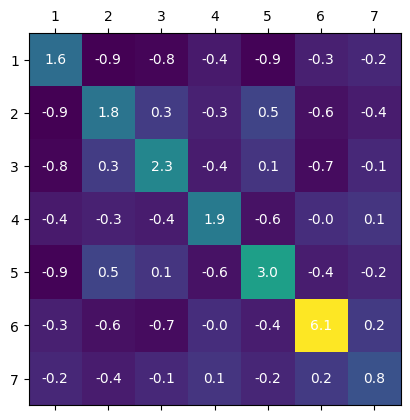

In [86]:
# highlight the block are significant
clusterMatrixNo7 = clusterMatrix[:, :7].copy()
rowExp = [np.sum(clusterMatrix[row, 0:7]) / np.sum(clusterMatrixNo7) for row in range(7)]
colExp = [np.sum(clusterMatrix[:, col]) / np.sum(clusterMatrixNo7) for col in range(7)]
total = np.sum(clusterMatrixNo7)
for i in range(7):
    for j in range(7):
        expected = rowExp[i] * colExp[j] * total
        clusterMatrixNo7[i][j] = (clusterMatrix[i][j] - expected) / expected
plt.figure(figsize=(30, 30))
plt.matshow(clusterMatrixNo7, cmap='viridis')
plt.grid(False)
for (i, j), val in np.ndenumerate(clusterMatrixNo7):
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='white')
xy_labels = ['1', '2', '3', '4', '5', '6', '7']
plt.xticks(range(len(xy_labels)), xy_labels)
plt.yticks(range(len(xy_labels)), xy_labels)
plt.savefig(f"./pics/{'simpClusterResidualMatrix.png' if USE_SIMPLE_DATA else 'rawClusterResidualMatrix.png'}")

<Figure size 3000x3000 with 0 Axes>

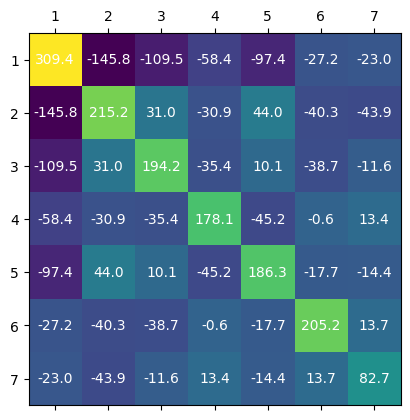

In [87]:
clusterMatrixNo7 = clusterMatrix[:, :7].copy()
rowExp = [np.sum(clusterMatrix[row, 0:7]) / np.sum(clusterMatrix[:, :7]) for row in range(7)]
colExp = [np.sum(clusterMatrix[:, col]) / np.sum(clusterMatrix[:, :7]) for col in range(7)]
total = np.sum(clusterMatrixNo7)
for i in range(7):
    for j in range(7):
        expected = rowExp[i] * colExp[j] * total
        clusterMatrixNo7[i][j] = (clusterMatrix[i][j] - expected) / np.sqrt(
            expected * (1 - 7 / total) * (1 - 7 / total))
plt.figure(figsize=(30, 30))
plt.matshow(clusterMatrixNo7, cmap='viridis')
plt.grid(False)
for (i, j), val in np.ndenumerate(clusterMatrixNo7):
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='white')
plt.xticks(range(len(xy_labels)), xy_labels)
plt.yticks(range(len(xy_labels)), xy_labels)
plt.savefig(f"./pics/{'simpClusterOverExpMatrix.png' if USE_SIMPLE_DATA else 'rawClusterOverExpMatrix.png'}")

<Figure size 3000x3000 with 0 Axes>

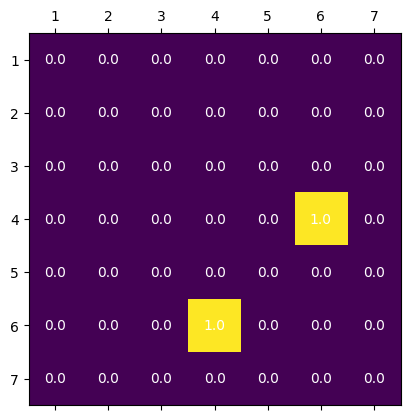

In [88]:

clusterMatrixNo7 = clusterMatrix[:, :7].copy()
rowExp = [np.sum(clusterMatrix[row, 0:7]) / np.sum(clusterMatrix[:, :7]) for row in range(7)]
colExp = [np.sum(clusterMatrix[:, col]) / np.sum(clusterMatrix[:, :7]) for col in range(7)]
total = np.sum(clusterMatrixNo7)
for i in range(7):
    for j in range(7):
        expected = rowExp[i] * colExp[j] * total
        clusterMatrixNo7[i][j] = chi2.sf(
            (clusterMatrix[i][j] - expected) ** 2 / (expected * (1 - 7 / total) * (1 - 7 / total)), df=36)
plt.figure(figsize=(30, 30))
plt.matshow(clusterMatrixNo7, cmap='viridis')
plt.grid(False)
for (i, j), val in np.ndenumerate(clusterMatrixNo7):
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='white')
plt.xticks(range(len(xy_labels)), xy_labels)
plt.yticks(range(len(xy_labels)), xy_labels)
plt.show()

<Figure size 3000x3000 with 0 Axes>

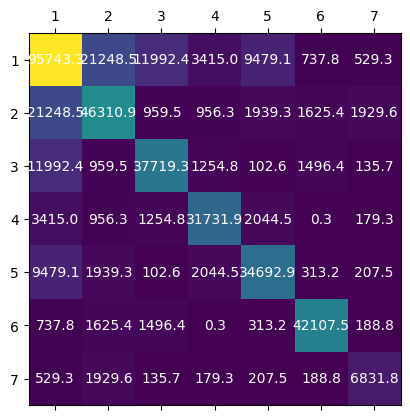

In [89]:

clusterMatrixNo7 = clusterMatrix[:, :7].copy()
rowExp = [np.sum(clusterMatrix[row, 0:7]) / np.sum(clusterMatrix[:, :7]) for row in range(7)]
colExp = [np.sum(clusterMatrix[:, col]) / np.sum(clusterMatrix[:, :7]) for col in range(7)]
total = np.sum(clusterMatrixNo7)
for i in range(7):
    for j in range(7):
        expected = rowExp[i] * colExp[j] * total
        clusterMatrixNo7[i][j] = (clusterMatrix[i][j] - expected) ** 2 / (expected * (1 - 7 / total) * (1 - 7 / total))
plt.figure(figsize=(30, 30))
plt.matshow(clusterMatrixNo7, cmap='viridis')
plt.grid(False)
for (i, j), val in np.ndenumerate(clusterMatrixNo7):
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='white')
plt.xticks(range(len(xy_labels)), xy_labels)
plt.yticks(range(len(xy_labels)), xy_labels)
plt.show()

In [90]:
print([np.sum(clusterMatrix[row][0:7]) for row in range(7)], [np.sum(clusterMatrix[:, col]) for col in range(7)])
clusterMatrix


[np.float64(136337.0), np.float64(84757.0), np.float64(59224.0), np.float64(64272.0), np.float64(42950.0), np.float64(23420.0), np.float64(68332.0)] [np.float64(136337.0), np.float64(84757.0), np.float64(59224.0), np.float64(64272.0), np.float64(42950.0), np.float64(23420.0), np.float64(68332.0)]


array([[99716.,  1476.,  2633., 10381.,  1456.,  4445., 16230., 29612.],
       [ 1476., 41334., 13643.,  8069., 11433.,  1547.,  7255., 14419.],
       [ 2633., 13643., 23932.,  4785.,  6045.,   813.,  7373., 12450.],
       [10381.,  8069.,  4785., 25156.,  2328.,  3108., 10445.,  9946.],
       [ 1456., 11433.,  6045.,  2328., 15404.,  1288.,  4996., 14569.],
       [ 4445.,  1547.,   813.,  3108.,  1288.,  8086.,  4133.,  7112.],
       [16230.,  7255.,  7373., 10445.,  4996.,  4133., 17900., 15645.]])

In [91]:

clusterMatrix = np.zeros((7, 8))
for i in range(7):
    for j in range(8):
        clusterMatrix[i][j] = np.nanmean(clusterTransfer[i][j])

<Figure size 3000x3000 with 0 Axes>

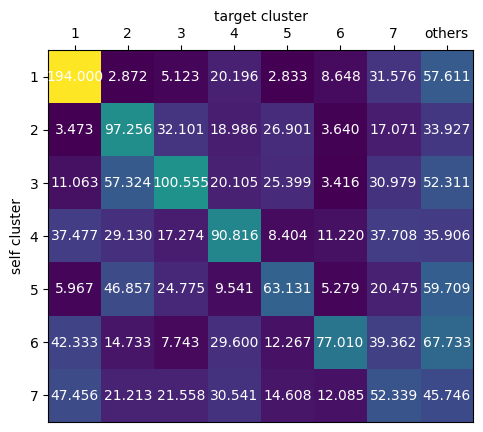

In [92]:
# draw the cluster transfer matrix
plt.figure(figsize=(30, 30))
plt.matshow(clusterMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(clusterMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')

x_labels = ['1', '2', '3', '4', '5', '6', '7', 'others']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.grid(False)
plt.savefig(f"./pics/{'simpClusterStrengthMatrix.png' if USE_SIMPLE_DATA else 'rawClusterStrengthMatrix.png'}")

# average transfer connection between clusters

In [93]:
# caculate the cluster transfer matrix
clusterTransfer = [[[] for i in range(8)] for j in range(7)]
for node in G.nodes():
    sumofconnection = 0
    temp = [[] for _ in range(8)]
    if int(G.nodes[node]['cluster']) != 8:
        for neighbor in G.neighbors(node):
            try:
                temp[G.nodes[neighbor]['cluster'] - 1].append(G.edges[node, neighbor]['weight'])
                sumofconnection += G.edges[node, neighbor]['weight']
            except IndexError:
                pass
        for i in range(8):
            temp[i] = np.sum(temp[i])
            clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i] / sumofconnection)

clusterMatrix = np.zeros((7, 8))
for idxr, row in enumerate(clusterTransfer):
    for idxc, colist in enumerate(row):
        clusterMatrix[idxr][idxc] = np.nanmean(colist)



/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_9798/1139136770.py:15: RuntimeWarning: invalid value encountered in scalar divide
  clusterTransfer[int(G.nodes[node]['cluster']) - 1][i].append(temp[i]/sumofconnection)


<Figure size 3000x3000 with 0 Axes>

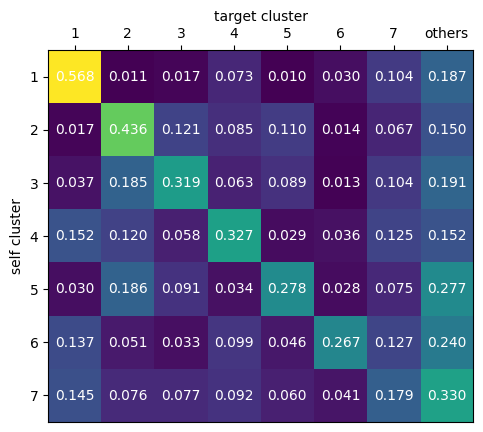

In [94]:
# draw the cluster transfer matrix
plt.figure(figsize=(30, 30))
plt.matshow(clusterMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(clusterMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')

x_labels = ['1', '2', '3', '4', '5', '6', '7', 'others']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.grid(False)
plt.savefig(f"./pics/{'simpClusterStrengthMatrix.png' if USE_SIMPLE_DATA else 'rawClusterStrengthMatrix.png'}")

<Figure size 3000x3000 with 0 Axes>

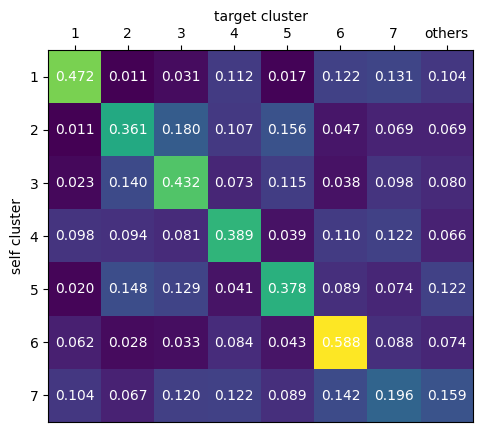

In [95]:
# adjest by size
sizemap = clusterData.groupby('cluster').size().to_dict()
sizemap[8] = len(G.nodes) - len(clusterData)
adjMatrix = np.zeros((7, 8))
for i in range(7):
    for j in range(8):
        adjMatrix[i][j] = clusterMatrix[i][j] / sizemap[j + 1]
rowsum = np.sum(adjMatrix, axis=1)
for i in range(7):
    for j in range(8):
        adjMatrix[i][j] = adjMatrix[i][j] / rowsum[i]

# draw the cluster transfer matrix
plt.figure(figsize=(30, 30))
plt.matshow(adjMatrix, cmap='viridis')
for (i, j), val in np.ndenumerate(adjMatrix):
    plt.text(j, i, f'{val:.3f}', ha='center', va='center', color='white')
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(7), [_ for _ in range(1, 8)])
plt.ylabel('self cluster')
plt.xlabel('target cluster')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.grid(False)
plt.savefig("./pics/adjClusterStrengthMatrix.png" if USE_SIMPLE_DATA else "./pics/rawAdjClusterStrengthMatrix.png")

# caculate the connection inside and outside the cluster

In [172]:
clusterData['incluster'] = None
clusterData['outcluster'] = None
for node in G.nodes():
    incluster, outcluster = 0, 0
    selfcluster = G.nodes[node]['cluster']
    for neighbor in G.neighbors(node):
        if G.nodes[neighbor]['cluster'] == selfcluster:
            incluster += G.edges[node, neighbor]['weight']
        else:
            outcluster += G.edges[node, neighbor]['weight']
    cleaned_code = node.replace("check_", "").replace("_NO_1_109_0_3.html", "").replace("music_dep_", "").replace(
        "_NO_0_109_0_3.html", "").replace("_NO_1_109_1_3.html", "")
    try:
        cleaned_code = int(cleaned_code)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code, 'incluster'] = incluster / (incluster + outcluster)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code, 'outcluster'] = outcluster / (incluster + outcluster)
    except:
        pass




# add centerity 

In [97]:
centerity = nx.eigenvector_centrality(G)
clusterData['eigenCentrality'] = None
for node in G.nodes():
    cleaned_code = node.replace("check_", "").replace("_NO_1_109_0_3.html", "").replace("music_dep_", "").replace(
        "_NO_0_109_0_3.html", "").replace("_NO_1_109_1_3.html", "")
    try:
        cleaned_code = int(cleaned_code)
        clusterData.loc[clusterData['學系代碼'] == cleaned_code, 'eigenCentrality'] = centerity[node]
    except:
        pass

In [98]:
clusterData.head()

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0        1812          0          0          0          0          0  30.0   
1        1858         12          0          0          0          0  10.0   
2        1892         12          0          0          0          0  10.0   
3        1719         12          0          0          0          0   3.0   
4        1461         12          0          0          0          0  10.0   

   英文倍率  數學倍率  社會倍率  ...  自設科目組合倍率  unitier  預定甄試人數  甄試費用 口試佔比 書審佔比  cluster  \
0  30.0  30.0  30.0  ...       0.0        1     255     0  0.0  0.0        7   
1  30.0  30.0  30.0  ...       0.0        1      50   480  0.6  0.0        5   
2  30.0  30.0  30.0  ...       0.0        2      80   480  0.6  0.0        5   
3  30.0  30.0  30.0  ...       0.0        2     135   680  0.4  0.2        5   
4  30.0  30.0  30.0  ...       0.0        2      50   480  0.0  0.8        5   

   incluster  outcluster  eigenCentrality  
0       None        None              0.0  
1   0.280899    0.719101         0.004898  
2   0.316129    0.683871         0.008268  
3   0.249315    0.750685         0.029054  
4   0.265306    0.734694         0.006435  

[5 rows x 33 columns]

# add cluster centerity


In [99]:
subgraphs = [G.subgraph([node for node in G.nodes if G.nodes[node]['cluster'] == i]) for i in range(1, 8)]
centertys = [nx.eigenvector_centrality(G) for G in subgraphs]
clusterData['clusterEigenCentrality'] = None
for i in range(1, 8):
    for node in subgraphs[i - 1].nodes():
        cleaned_code = node.replace("check_", "").replace("_NO_1_109_0_3.html", "").replace("music_dep_", "").replace(
            "_NO_0_109_0_3.html", "").replace("_NO_1_109_1_3.html", "")
        try:
            cleaned_code = int(cleaned_code)
            clusterData.loc[clusterData['學系代碼'] == cleaned_code, 'clusterEigenCentrality'] = centertys[i - 1][node]
        except:
            pass

In [100]:
clusterData.groupby('cluster').mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x12fad1640>>

# visualize the cluster connection

In [101]:
clustersum = np.zeros((7, 7))
for i in range(7):
    for j in range(7):
        clustersum[i][j] = np.nansum(clusterTransfer[i][j])

1 1 291.37931979290477
1 2 5.658690582052955
1 3 8.69733967569292
1 4 37.356714570052134
1 5 5.092260131297493
1 6 15.623290109474093
1 7 53.215118564839315
2 1 7.0200306010426985
2 2 185.38998286672995
2 3 51.62455444647536
2 4 36.125364942158335
2 5 46.727148219244384
2 6 6.077183311910121
2 7 28.36702563406072
3 1 8.827192252362439
3 2 43.991776785387756
3 3 75.92483278258487
3 4 14.99665587701049
3 5 21.099357955203956
3 6 3.026910404567364
3 7 24.637695811274117
4 1 42.22201972169359
4 2 33.243784835600664
4 3 16.127569096537627
4 4 90.57398404161029
4 5 8.093541656450556
4 6 9.83738988067784
4 7 34.72557788382006
5 1 7.210374040414731
5 2 44.86251297799066
5 3 21.990142562135965
5 4 8.263488629168926
5 5 67.04369889004496
5 6 6.774912377260509
5 7 17.99051299145676
6 1 14.376017940766996
6 2 5.381002384455183
6 3 3.466692508280005
6 4 10.421637803771901
6 5 4.785181695735686
6 6 28.01413886729979
6 7 13.365379118625452
7 1 47.04361022140749
7 2 24.667011229903984
7 3 24.962736957

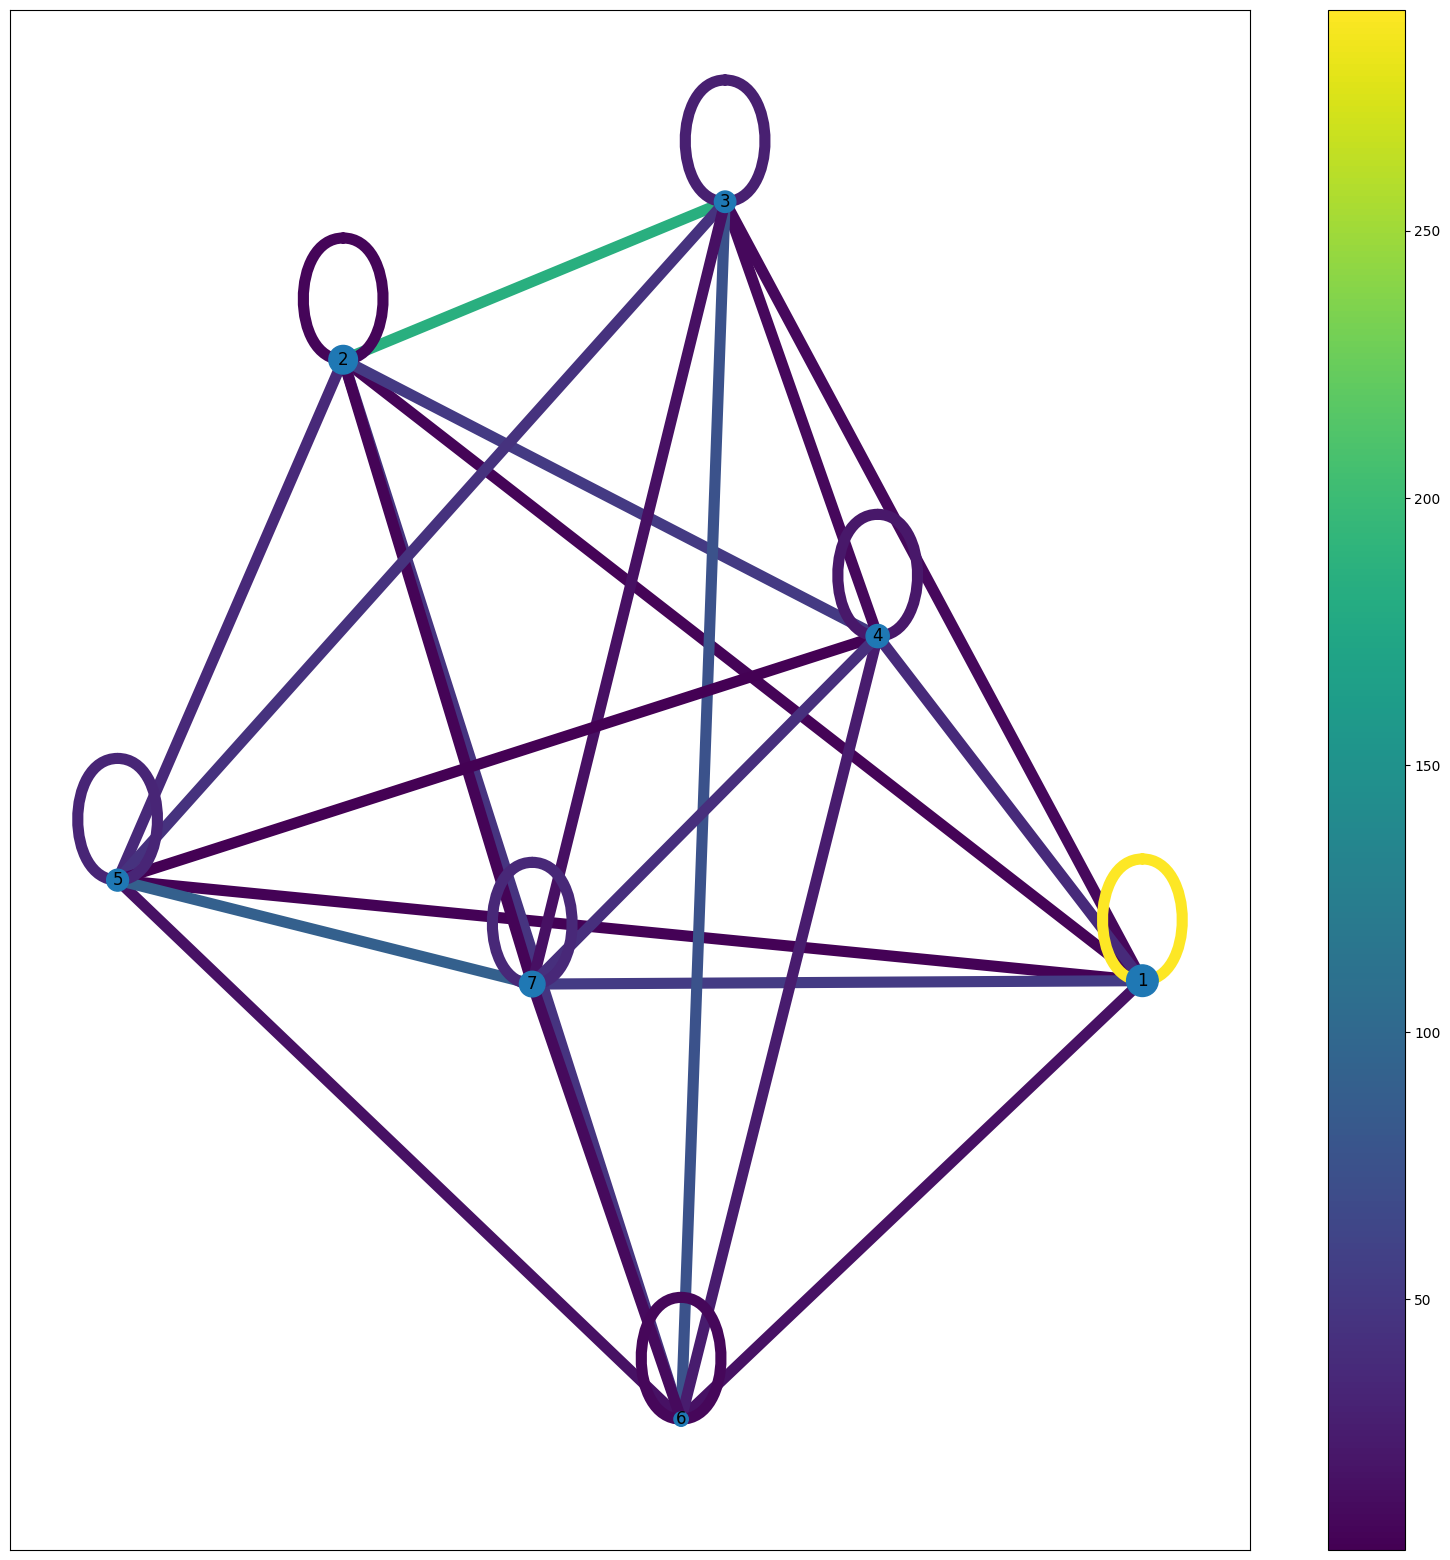

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(20, 20))
Gcluster = nx.Graph()
pos = {}
for i in range(7):
    for j in range(7):
        Gcluster.add_edge(i + 1, j + 1, weight=clustersum[i][j])
        print(i + 1, j + 1, clustersum[i][j])
    pos[i + 1] = clusterData.loc[clusterData['cluster'] == i + 1, ['tsnepos1', 'tsnepos2']].mean().values
node_options = {
    'node_size': [clusterData.loc[clusterData['cluster'] == i + 1].shape[0] for i in range(7)],
    'nodelist': [i + 1 for i in range(7)]
}
edge_weights = [clustersum[u][v] for u in range(7) for v in range(7)]

norm = plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_colors = [plt.cm.viridis(norm(w)) for w in edge_weights]
nx.draw_networkx_nodes(Gcluster, pos=pos, **node_options)

pathcollection = nx.draw_networkx_edges(
    Gcluster,
    pos=pos,
    edge_color=edge_colors,
    width=8
)

# 5. 画标签
label_options = {}
nx.draw_networkx_labels(Gcluster, pos=pos, **label_options)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca())

plt.show()

plt.savefig(f"./pics/{'simpClusterConnection.png' if USE_SIMPLE_DATA else 'rawClusterConnection.png'}")

In [103]:
for edge_ in Gcluster.edges:
    print(edge_, Gcluster.edges[edge_])

(1, 1) {'weight': np.float64(291.37931979290477)}
(1, 2) {'weight': np.float64(7.0200306010426985)}
(1, 3) {'weight': np.float64(8.827192252362439)}
(1, 4) {'weight': np.float64(42.22201972169359)}
(1, 5) {'weight': np.float64(7.210374040414731)}
(1, 6) {'weight': np.float64(14.376017940766996)}
(1, 7) {'weight': np.float64(47.04361022140749)}
(2, 2) {'weight': np.float64(185.38998286672995)}
(2, 3) {'weight': np.float64(43.991776785387756)}
(2, 4) {'weight': np.float64(33.243784835600664)}
(2, 5) {'weight': np.float64(44.86251297799066)}
(2, 6) {'weight': np.float64(5.381002384455183)}
(2, 7) {'weight': np.float64(24.667011229903984)}
(3, 3) {'weight': np.float64(75.92483278258487)}
(3, 4) {'weight': np.float64(16.127569096537627)}
(3, 5) {'weight': np.float64(21.990142562135965)}
(3, 6) {'weight': np.float64(3.466692508280005)}
(3, 7) {'weight': np.float64(24.96273695758889)}
(4, 4) {'weight': np.float64(90.57398404161029)}
(4, 5) {'weight': np.float64(8.263488629168926)}
(4, 6) {'we

# incluster 108

In [104]:
path = "/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes"
os.chdir(path)

# load the data
departmentDict108 = {}
with open("./rawData/cross108/university.json") as f:
    universityDict = json.load(f)
for Ukey, Uvalue in universityDict.items():
    with open(f"./rawData/cross108/{Ukey}.json") as f:
        department = json.load(f)
    for Skey, Svalue in department.items():
        departmentDict108[f"{Ukey}_{Skey}"] = Svalue


In [105]:

# reverse the key and value
rev_departmentDict108 = {v: list(k.split('_')) for k, v in departmentDict108.items()}

In [107]:
len(departmentDict.keys())

2159

In [108]:
# transfer to networkx Graph
with open("./rawData/cross108/students.json") as f:
    studentDict = json.load(f)
cluster = dict()
G108 = nx.Graph()
it = 0
for key, val in departmentDict108.items():
    G108.add_node(val, cnname=key)
    it += 1
for dep in studentDict:
    for head, tail in dep.items():
        for link, weight in tail.items():
            G108.add_edge(head, link, weight=weight)


In [109]:
clusterMap108 = {f"{row['學系代碼']:06d}": row['cluster'] for idx, row in clusterData.iterrows()}

In [110]:
print(f'nodes: {G108.number_of_nodes()}, edges: {G108.size()}')


nodes: 2880, edges: 151603


In [111]:
for node in G108.nodes:
    node_ = node.replace("check_", "").replace("_NO_1_108_0_3.html", "").replace("music_dep_", "").replace(
        "_NO_0_108_0_3.html", "").replace("_NO_1_108_1_3.html", "")
    try:
        G108.nodes[node]['cluster'] = clusterMap108[node_]
    except:
        G108.nodes[node]['cluster'] = 8
    try:
        G108.nodes[node]['code'] = node_
    except:
        G108.nodes[node]['code'] = None

In [112]:
clusterData['incluster108'] = None
clusterData['outcluster108'] = None
for node in G108.nodes():
    incluster, outcluster = 0, 0
    selfcluster = G108.nodes[node]['cluster']
    failnum = 0
    print(selfcluster)
    print(node)
    for neighbor in G108.neighbors(node):
        if G108.nodes[neighbor]['cluster'] == selfcluster:
            incluster += G108.edges[node, neighbor]['weight']
        else:
            outcluster += G108.edges[node, neighbor]['weight']
    #cleaned_code = node.replace("check_","").replace("_NO_1_108_0_3.html","").replace("music_dep_","").replace("_NO_0_108_0_3.html","").replace("_NO_1_108_1_3.html","").replace("_NO_0_108_1_3.html","").replace("__1_108__3.html","").replace("__1_108__3.html","")
    #print(cleaned_code)
    try:
        #cleaned_code = int(cleaned_code)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'incluster108' ] = incluster/(incluster + outcluster)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'outcluster108'] = outcluster/(incluster + outcluster)
        university, department = rev_departmentDict108[node]
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2, 'incluster108'] = incluster / (incluster + outcluster)
        clusterData.loc[mask1 & mask2, 'outcluster108'] = outcluster / (incluster + outcluster)
        # show the index that mask1, 2 is not true then failnum +1
        if (mask1 & mask2).index() == []:
            failnum += 1
    except:
        pass


2
check_001012_NO_1_108_0_3.html
2
check_001022_NO_1_108_0_3.html
2
check_001032_NO_1_108_0_3.html
4
check_001042_NO_1_108_0_3.html
2
check_001052_NO_1_108_0_3.html
2
check_001062_NO_1_108_0_3.html
2
check_001072_NO_1_108_0_3.html
2
check_001082_NO_1_108_0_3.html
1
check_001092_NO_1_108_0_3.html
4
check_001102_NO_1_108_0_3.html
1
check_001112_NO_1_108_0_3.html
1
check_001122_NO_1_108_0_3.html
1
check_001132_NO_1_108_0_3.html
4
check_001142_NO_1_108_0_3.html
1
check_001152_NO_1_108_0_3.html
2
check_001162_NO_1_108_0_3.html
2
check_001172_NO_1_108_0_3.html
2
check_001182_NO_1_108_0_3.html
6
check_001192_NO_1_108_0_3.html
2
check_001202_NO_1_108_0_3.html
2
check_001212_NO_1_108_0_3.html
1
check_001222_NO_1_108_0_3.html
1
check_001232_NO_1_108_0_3.html
1
check_001242_NO_1_108_0_3.html
1
check_001252_NO_1_108_0_3.html
1
check_001262_NO_1_108_0_3.html
1
check_001272_NO_1_108_0_3.html
1
check_001282_NO_1_108_0_3.html
1
check_001292_NO_1_108_0_3.html
1
check_001302_NO_1_108_0_3.html
1
check_00

# 108 centerity

In [164]:
centerity = nx.eigenvector_centrality(G108)
clusterData['eigenCentrality108'] = None
for node in G108.nodes():
    #cleaned_code = node.replace("check_","").replace("_NO_1_108_0_3.html","").replace("music_dep_","").replace("_NO_0_108_0_3.html","").replace("_NO_1_108_1_3.html","")
    try:
        #cleaned_code = int(cleaned_code)
        university, department = rev_departmentDict108[node]
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2, 'eigenCentrality108'] = centerity[node]
    except:
        pass

# add cluster centerity 108

In [165]:
subgraphs = [G108.subgraph([node for node in G108.nodes if G108.nodes[node]['cluster'] == i]) for i in range(1, 8)]
centertys = [nx.eigenvector_centrality(G108) for G108 in subgraphs]
clusterData['clusterEigenCentrality108'] = None
for i in range(1, 8):
    for node in subgraphs[i - 1].nodes():
        #cleaned_code = node.replace("check_","").replace("_NO_1_108_0_3.html","").replace("music_dep_","").replace("_NO_0_108_0_3.html","").replace("_NO_1_108_1_3.html","")
        try:
            print(node)
            #cleaned_code = int(cleaned_code)
            university, department = rev_departmentDict108[node]
            print(university, department)
            mask1 = clusterData['學校名稱_encoded'] == university
            mask2 = clusterData['學系名稱_trim'] == department
            clusterData.loc[mask1 & mask2, 'clusterEigenCentrality108'] = centertys[i - 1][node]
            print(clusterData.loc[mask1 & mask2, ['clusterEigenCentrality108', '學校名稱_encoded', '學系名稱_trim']])
        except:
            pass

check_003382_NO_1_108_0_3.html
國立中興大學 生命科學系
     clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
1110                  0.074654       國立中興大學     生命科學系
check_108042_NO_1_108_0_3.html
慈濟大學 護理學系
     clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
2080                  0.019041         慈濟大學      護理學系
check_014432_NO_1_108_0_3.html
淡江大學 電機工程學系電機與系統組
     clusterEigenCentrality108 學校名稱_encoded     學系名稱_trim
2006                  0.012886         淡江大學  電機工程學系電機與系統組
check_150052_NO_1_108_0_3.html
國立宜蘭大學 機械與機電工程學系
     clusterEigenCentrality108 學校名稱_encoded  學系名稱_trim
1206                  0.012221       國立宜蘭大學  機械與機電工程學系
check_007102_NO_1_108_0_3.html
高雄醫學大學 醫學影像暨放射科學系
    clusterEigenCentrality108 學校名稱_encoded   學系名稱_trim
658                  0.050426       高雄醫學大學  醫學影像暨放射科學系
check_003312_NO_1_108_0_3.html
國立中興大學 植物病理學系
     clusterEigenCentrality108 學校名稱_encoded 學系名稱_trim
1109                  0.052479       國立中興大學    植物病理學系
check_003242_NO_1_108_0_3.html
國立中興大學 生物產業機電工程學系
     clusterEig

# incluster107


In [115]:
path = "/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes"
os.chdir(path)

# load the data
departmentDict107 = {}
with open("./rawData/cross107/university.json") as f:
    universityDict = json.load(f)
for Ukey, Uvalue in universityDict.items():
    with open(f"./rawData/cross107/{Ukey}.json") as f:
        department = json.load(f)
    for Skey, Svalue in department.items():
        departmentDict107[f"{Ukey}_{Skey}"] = Svalue


In [116]:
# reverse the key and value
rev_departmentDict107 = {v: list(k.split('_')) for k, v in departmentDict107.items()}

In [117]:
rev_departmentDict107

{'check_001012_NO_1_107_0_3.html': ['國立臺灣大學', '中國文學系'],
 'check_001022_NO_1_107_0_3.html': ['國立臺灣大學', '外國語文學系'],
 'check_001032_NO_1_107_0_3.html': ['國立臺灣大學', '歷史學系'],
 'check_001042_NO_1_107_0_3.html': ['國立臺灣大學', '哲學系'],
 'check_001052_NO_1_107_0_3.html': ['國立臺灣大學', '人類學系'],
 'check_001062_NO_1_107_0_3.html': ['國立臺灣大學', '圖書資訊學系'],
 'check_001072_NO_1_107_0_3.html': ['國立臺灣大學', '日本語文學系'],
 'check_001082_NO_1_107_0_3.html': ['國立臺灣大學', '戲劇學系'],
 'check_001092_NO_1_107_0_3.html': ['國立臺灣大學', '數學系'],
 'check_001102_NO_1_107_0_3.html': ['國立臺灣大學', '物理學系'],
 'check_001112_NO_1_107_0_3.html': ['國立臺灣大學', '化學系'],
 'check_001122_NO_1_107_0_3.html': ['國立臺灣大學', '地質科學系'],
 'check_001132_NO_1_107_0_3.html': ['國立臺灣大學', '心理學系'],
 'check_001142_NO_1_107_0_3.html': ['國立臺灣大學', '地理環境資源學系'],
 'check_001152_NO_1_107_0_3.html': ['國立臺灣大學', '大氣科學系'],
 'check_001162_NO_1_107_0_3.html': ['國立臺灣大學', '政治學系政治理論組'],
 'check_001172_NO_1_107_0_3.html': ['國立臺灣大學', '政治學系國際關係組'],
 'check_001182_NO_1_107_0_3.html': ['國立臺灣大學',

In [118]:
# transfer to networkx Graph
with open("./rawData/cross107/students.json") as f:
    studentDict = json.load(f)
cluster = dict()
G107 = nx.Graph()
it = 0
for key, val in departmentDict107.items():
    G107.add_node(val, cnname=key)
for dep in studentDict:
    for head, tail in dep.items():
        for link, weight in tail.items():
            G107.add_edge(head, link, weight=weight)

In [119]:
print(f'nodes : {G107.number_of_nodes()}, edges :{G107.size()}')

nodes : 2840, edges :171745


In [120]:
clusterMap107 = {f"{row['學系代碼']:06d}": row['cluster'] for idx, row in clusterData.iterrows()}

In [121]:
for node in G107.nodes:
    node_ = node.replace("check_", "").replace("_NO_1_107_0_3.html", "").replace("music_dep_", "").replace(
        "_NO_0_107_0_3.html", "").replace("_NO_1_107_1_3.html", "")
    try:
        G107.nodes[node]['cluster'] = clusterMap107[node_]
    except:
        G107.nodes[node]['cluster'] = 8
    try:
        G107.nodes[node]['code'] = node_
    except:
        G107.nodes[node]['code'] = None

In [122]:
clusterData['incluster107'] = None
clusterData['outcluster107'] = None
for node in G107.nodes():
    incluster, outcluster = 0, 0
    selfcluster = G107.nodes[node]['cluster']
    print(selfcluster)
    print(node)
    for neighbor in G107.neighbors(node):
        if G107.nodes[neighbor]['cluster'] == selfcluster:
            incluster += G107.edges[node, neighbor]['weight']
        else:
            outcluster += G107.edges[node, neighbor]['weight']
    #cleaned_code = node.replace("check_","").replace("_NO_1_107_0_3.html","").replace("music_dep_","").replace("_NO_0_107_0_3.html","").replace("_NO_1_107_1_3.html","").replace("_NO_0_107_1_3.html","").replace("__1_107__3.html","").replace("__1_107__3.html","")
    #print(cleaned_code)
    try:
        #cleaned_code = int(cleaned_code)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'incluster107' ] = incluster/(incluster + outcluster)
        #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'outcluster107'] = outcluster/(incluster + outcluster)
        university, department = rev_departmentDict107[node]
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2, 'incluster107'] = incluster / (incluster + outcluster)
        clusterData.loc[mask1 & mask2, 'outcluster107'] = outcluster / (incluster + outcluster)

    except:
        pass

2
check_001012_NO_1_107_0_3.html
2
check_001022_NO_1_107_0_3.html
2
check_001032_NO_1_107_0_3.html
4
check_001042_NO_1_107_0_3.html
2
check_001052_NO_1_107_0_3.html
2
check_001062_NO_1_107_0_3.html
2
check_001072_NO_1_107_0_3.html
2
check_001082_NO_1_107_0_3.html
1
check_001092_NO_1_107_0_3.html
4
check_001102_NO_1_107_0_3.html
1
check_001112_NO_1_107_0_3.html
1
check_001122_NO_1_107_0_3.html
1
check_001132_NO_1_107_0_3.html
4
check_001142_NO_1_107_0_3.html
1
check_001152_NO_1_107_0_3.html
2
check_001162_NO_1_107_0_3.html
2
check_001172_NO_1_107_0_3.html
2
check_001182_NO_1_107_0_3.html
6
check_001192_NO_1_107_0_3.html
2
check_001202_NO_1_107_0_3.html
2
check_001212_NO_1_107_0_3.html
1
check_001222_NO_1_107_0_3.html
1
check_001232_NO_1_107_0_3.html
1
check_001242_NO_1_107_0_3.html
1
check_001252_NO_1_107_0_3.html
1
check_001262_NO_1_107_0_3.html
1
check_001272_NO_1_107_0_3.html
1
check_001282_NO_1_107_0_3.html
1
check_001292_NO_1_107_0_3.html
1
check_001302_NO_1_107_0_3.html
1
check_00

# 107 centerity

In [123]:
centerity = nx.eigenvector_centrality(G107)
clusterData['eigenCentrality107'] = None
for node in G107.nodes():
    #cleaned_code = node.replace("check_","").replace("_NO_1_107_0_3.html","").replace("music_dep_","").replace("_NO_0_107_0_3.html","").replace("_NO_1_107_1_3.html","")
    try:
        #cleaned_code = int(cleaned_code)
        university, department = rev_departmentDict107[node]
        print(university, department)
        mask1 = clusterData['學校名稱_encoded'] == university
        mask2 = clusterData['學系名稱_trim'] == department
        clusterData.loc[mask1 & mask2, 'eigenCentrality107'] = centerity[node]
    except:
        pass

國立臺灣大學 中國文學系
國立臺灣大學 外國語文學系
國立臺灣大學 歷史學系
國立臺灣大學 哲學系
國立臺灣大學 人類學系
國立臺灣大學 圖書資訊學系
國立臺灣大學 日本語文學系
國立臺灣大學 戲劇學系
國立臺灣大學 數學系
國立臺灣大學 物理學系
國立臺灣大學 化學系
國立臺灣大學 地質科學系
國立臺灣大學 心理學系
國立臺灣大學 地理環境資源學系
國立臺灣大學 大氣科學系
國立臺灣大學 政治學系政治理論組
國立臺灣大學 政治學系國際關係組
國立臺灣大學 政治學系公共行政組
國立臺灣大學 經濟學系
國立臺灣大學 社會學系
國立臺灣大學 社會工作學系
國立臺灣大學 醫學系
國立臺灣大學 醫學系(公費生)
國立臺灣大學 牙醫學系
國立臺灣大學 藥學系
國立臺灣大學 醫學檢驗暨生物技術學系
國立臺灣大學 護理學系
國立臺灣大學 護理學系(公費生)
國立臺灣大學 物理治療學系
國立臺灣大學 職能治療學系
國立臺灣大學 土木工程學系
國立臺灣大學 機械工程學系
國立臺灣大學 化學工程學系
國立臺灣大學 工程科學及海洋工程學系
國立臺灣大學 材料科學與工程學系
國立臺灣大學 醫學工程學系
國立臺灣大學 農藝學系
國立臺灣大學 生物環境系統工程學系
國立臺灣大學 農業化學系
國立臺灣大學 森林環境暨資源學系
國立臺灣大學 動物科學技術學系
國立臺灣大學 農業經濟學系
國立臺灣大學 園藝暨景觀學系
國立臺灣大學 獸醫學系
國立臺灣大學 生物產業傳播暨發展學系
國立臺灣大學 生物產業機電工程學系
國立臺灣大學 昆蟲學系
國立臺灣大學 植物病理與微生物學系
國立臺灣大學 工商管理學系企業管理組
國立臺灣大學 工商管理學系科技管理組
國立臺灣大學 會計學系
國立臺灣大學 財務金融學系
國立臺灣大學 國際企業學系
國立臺灣大學 資訊管理學系
國立臺灣大學 公共衛生學系
國立臺灣大學 電機工程學系
國立臺灣大學 資訊工程學系
國立臺灣大學 法律學系法學組
國立臺灣大學 法律學系司法組
國立臺灣大學 法律學系財經法學組
國立臺灣大學 生命科學系
國立臺灣大學 生化科技學系
國立臺灣大學 醫學系(繁星第八類)
國立臺灣師範大學 教育學系
國立臺灣師範大學 教育心理與輔導學系
國立臺灣師範大學 社會教育學系
國立臺灣師範大學 健康促進與衛生教育學系
國立臺灣師範大學 人類發展與家庭學系家庭生活教

In [124]:
clusterData.eigenCentrality107

0           None
1           None
2           None
3           None
4           None
          ...   
2149    0.029767
2150    0.002075
2151    0.018086
2152    0.023621
2153        None
Name: eigenCentrality107, Length: 2154, dtype: object

# add cluster centerity 107

In [125]:
subgraphs = [G107.subgraph([node for node in G107.nodes if G107.nodes[node]['cluster'] == i]) for i in range(1, 8)]
centertys = [nx.eigenvector_centrality(G107) for G107 in subgraphs]
clusterData['clusterEigenCentrality107'] = None
for i in range(1, 8):
    for node in subgraphs[i - 1].nodes():
        print(node)
        #cleaned_code = node.replace("check_","").replace("_NO_1_107_0_3.html","").replace("music_dep_","").replace("_NO_0_107_0_3.html","").replace("_NO_1_107_1_3.html","")
        try:
            #cleaned_code = int(cleaned_code)
            #clusterData.loc[clusterData['學系代碼'] == cleaned_code,'clusterEigenCentrality107'] = centertys[i-1][node]
            university, department = rev_departmentDict107[node]
            mask1 = clusterData['學校名稱_encoded'] == university
            mask2 = clusterData['學系名稱_trim'] == department
            clusterData.loc[mask1 & mask2, 'clusterEigenCentrality107'] = centertys[i - 1][node]
            print(clusterData.loc[mask1 & mask2, ['clusterEigenCentrality107', '學校名稱_encoded', '學系名稱_trim']])
        except:
            pass

check_003212_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
1142                  0.054251       國立中興大學    化學工程學系
check_012152_NO_1_107_0_3.html
Empty DataFrame
Columns: [clusterEigenCentrality107, 學校名稱_encoded, 學系名稱_trim]
Index: []
check_030142_NO_1_107_0_3.html
    clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
115                   0.02278         長庚大學    電子工程學系
check_025062_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
1730                  0.050124       國立陽明大學      護理學系
check_100332_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
1028                  0.030305       國立嘉義大學     食品科學系
check_017162_NO_1_107_0_3.html
    clusterEigenCentrality107 學校名稱_encoded 學系名稱_trim
249                  0.001709       中國文化大學      地質學系
check_003342_NO_1_107_0_3.html
     clusterEigenCentrality107 學校名稱_encoded   學系名稱_trim
1112                  0.052662       國立中興大學  生物科技學士學位學程
check_007232_NO_1_107_0_3.html
Empty DataFrame


#print(
    clusterData.incluster107.value_counts(dropna = False)[None],
    clusterData.incluster108.value_counts(dropna = False)[None],
    clusterData.incluster.value_counts(dropna = False)[None],
)

# public or private

In [126]:
isPublic = clusterData.學校名稱_encoded.map(lambda x: 1 if '公立' in x or '國立' in x else 0)
clusterData['isPublic'] = isPublic

# add position 

In [127]:
schoolPos = pd.read_csv('./rawData/schoolPosition.csv')
schoolPos

school position  is_city
0          國立臺灣海洋大學      基隆市        1
1            國立臺灣大學      台北市        1
2          國立臺灣師範大學      台北市        1
3          國立臺灣科技大學      台北市        1
4    國立陽明交通大學(臺北校區)      台北市        1
..              ...      ...      ...
96             慈濟大學      花蓮縣        0
97           慈濟科技大學      花蓮縣        0
98           國立臺東大學      台東縣        0
99         國立澎湖科技大學      澎湖縣        0
100          國立金門大學      金門縣        0

[101 rows x 3 columns]

In [128]:
clusterData['position'] = None
clusterData['isCity'] = None
for idx, row in schoolPos.iterrows():
    try:
        temp = clusterData[clusterData['學校名稱_encoded'] == row['school']]
        for idx_, row_ in temp.iterrows():
            clusterData.loc[idx_, 'position'] = row['position']
            clusterData.loc[idx_, 'isCity'] = row['is_city']
    except:
        pass

In [129]:
clusterData

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0           1812          0          0          0          0          0  30.0   
1           1858         12          0          0          0          0  10.0   
2           1892         12          0          0          0          0  10.0   
3           1719         12          0          0          0          0   3.0   
4           1461         12          0          0          0          0  10.0   
...          ...        ...        ...        ...        ...        ...   ...   
2149         911          0          0         25          0          0  30.0   
2150        1031          0          0         50          0          0  30.0   
2151        1106          0          0         50          0          0  30.0   
2152        1181          0          0         50          0          0   3.0   
2153        1197          0         50          0          0          0   3.0   

      英文倍率  數學倍率  社會倍率  ...  outcluster108  eigenCentrality108  \
0     30.0  30.0  30.0  ...           None                None   
1     30.0  30.0  30.0  ...           None                None   
2     30.0  30.0  30.0  ...       0.843537            0.009078   
3     30.0  30.0  30.0  ...       0.803175             0.02887   
4     30.0  30.0  30.0  ...           None                None   
...    ...   ...   ...  ...            ...                 ...   
2149  30.0  30.0  30.0  ...       0.690289            0.031085   
2150  30.0   7.0  30.0  ...       0.982759            0.003733   
2151  30.0  30.0  30.0  ...       0.769826             0.02569   
2152   3.0   3.0  30.0  ...        0.84509            0.021782   
2153   8.0  30.0  30.0  ...       0.495575            0.013076   

      clusterEigenCentrality108  incluster107 outcluster107  \
0                          None          None          None   
1                          None          None          None   
2                      0.034485          None          None   
3                      0.097662          None          None   
4                          None          None          None   
...                         ...           ...           ...   
2149                   0.157276       0.29963       0.70037   
2150                   0.000873      0.037037      0.962963   
2151                   0.114322      0.263341      0.736659   
2152                    0.06356      0.160864      0.839136   
2153                   0.101236          None          None   

     eigenCentrality107  clusterEigenCentrality107  isPublic  position  isCity  
0                  None                       None         0       新北市       1  
1                  None                       None         0       新北市       1  
2                  None                       None         0       新北市       1  
3                  None                       None         0       新北市       1  
4                  None                       None         0       新北市       1  
...                 ...                        ...       ...       ...     ...  
2149           0.029767                   0.130524         0       桃園市       1  
2150           0.002075                   0.000272         0       桃園市       1  
2151           0.018086                   0.087023         0       桃園市       1  
2152           0.023621                   0.074189         0       桃園市       1  
2153               None                       None         0       桃園市       1  

[2154 rows x 45 columns]

# save file


In [130]:
clusterData.drop("Unnamed: 0", axis=1).to_csv(
    f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster.csv")

In [136]:
clusterData.head()

Unnamed: 0  國文檢定_code  英文檢定_code  數學檢定_code  社會檢定_code  自然檢定_code  國文倍率  \
0        1812          0          0          0          0          0  30.0   
1        1858         12          0          0          0          0  10.0   
2        1892         12          0          0          0          0  10.0   
3        1719         12          0          0          0          0   3.0   
4        1461         12          0          0          0          0  10.0   

   英文倍率  數學倍率  社會倍率  ...  outcluster108  eigenCentrality108  \
0  30.0  30.0  30.0  ...           None                None   
1  30.0  30.0  30.0  ...           None                None   
2  30.0  30.0  30.0  ...       0.843537            0.009078   
3  30.0  30.0  30.0  ...       0.803175             0.02887   
4  30.0  30.0  30.0  ...           None                None   

   clusterEigenCentrality108  incluster107 outcluster107 eigenCentrality107  \
0                       None          None          None               None   
1                       None          None          None               None   
2                   0.034485          None          None               None   
3                   0.097662          None          None               None   
4                       None          None          None               None   

   clusterEigenCentrality107  isPublic  position  isCity  
0                       None         0       新北市       1  
1                       None         0       新北市       1  
2                       None         0       新北市       1  
3                       None         0       新北市       1  
4                       None         0       新北市       1  

[5 rows x 45 columns]

In [137]:
clusterData.groupby('cluster').describe()

Unnamed: 0                                                            \
             count         mean         std    min      25%     50%      75%   
cluster                                                                        
1            517.0   724.460348  583.797466    0.0   224.00   595.0  1151.00   
2            425.0  1110.061176  605.457920    1.0   591.00  1116.0  1606.00   
3            238.0  1341.840336  576.945734   14.0   825.50  1470.0  1856.00   
4            279.0   876.566308  541.157315    5.0   374.00   898.0  1266.00   
5            248.0  1538.633065  490.682907   23.0  1433.25  1626.0  1892.75   
6            107.0  1400.429907  512.149063  124.0  1013.00  1508.0  1772.00   
7            340.0  1109.152941  534.766301    6.0   674.75  1057.0  1531.50   

                國文檢定_code             ...  書審佔比      isPublic            \
            max     count       mean  ...   75%  max    count      mean   
cluster                               ...                                 
1        2152.0     517.0  20.851064  ...  0.40  0.8    517.0  0.618956   
2        2147.0     425.0  33.371765  ...  0.30  0.8    425.0  0.475294   
3        2153.0     238.0  16.264706  ...  0.30  0.6    238.0  0.180672   
4        2125.0     279.0  32.960573  ...  0.35  1.0    279.0  0.666667   
5        2151.0     248.0  16.923387  ...  0.30  0.9    248.0  0.112903   
6        2116.0     107.0   2.196262  ...  0.30  0.5    107.0  0.196262   
7        2149.0     340.0   7.385294  ...  0.50  1.0    340.0  0.417647   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
1        0.486114  0.0  0.0  1.0  1.0  1.0  
2        0.499978  0.0  0.0  0.0  1.0  1.0  
3        0.385557  0.0  0.0  0.0  0.0  1.0  
4        0.472252  0.0  0.0  1.0  1.0  1.0  
5        0.317114  0.0  0.0  0.0  0.0  1.0  
6        0.399038  0.0  0.0  0.0  0.0  1.0  
7        0.493898  0.0  0.0  0.0  1.0  1.0  

[7 rows x 224 columns]

1. 節點數: 2923
2. 邊數: 153300
3. 密度: 0.0359
4. 度數分佈: hist[degree] = 節點數
5. 平均度數: 104.89
6. 連通分量: 共 82 個；最大分量節點數 2783
7. 平均聚類係數: 0.2681



1. 節點數: 2880
2. 邊數: 151603
3. 密度: 0.0366
4. 度數分佈: hist[degree] = 節點數
5. 平均度數: 105.28
6. 連通分量: 共 85 個；最大分量節點數 2734
7. 平均聚類係數: 0.2670



1. 節點數: 2840
2. 邊數: 171745
3. 密度: 0.0426
4. 度數分佈: hist[degree] = 節點數


KeyboardInterrupt: 

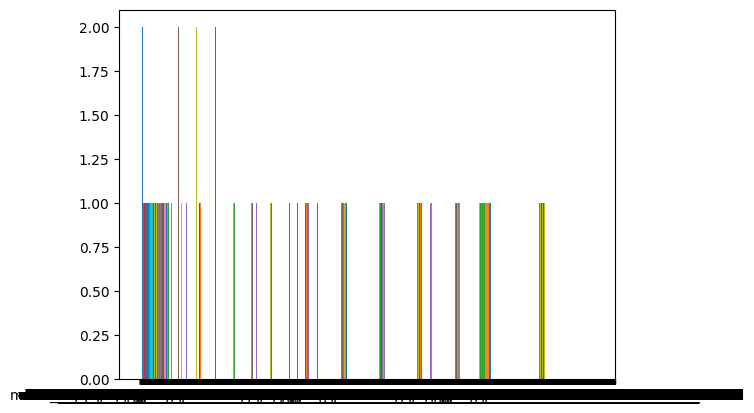

In [132]:
for G_ in [G, G108, G107]:
    # 1. 節點數 (N)
    num_nodes = G_.number_of_nodes()

    # 2. 邊數 (E)
    num_edges = G_.number_of_edges()

    # 3. 密度 (Density)
    density = nx.density(G_)

    # 4. 度數分佈 (Degree Distribution)
    degrees = [d for _, d in G_.degree()]
    degree_hist = nx.degree_histogram(G_)

    # 5. 平均度數 (Average Degree)
    avg_degree = sum(degrees) / num_nodes

    # 6. 連通分量 (Connected Components)
    components = list(nx.connected_components(G_))
    num_components = len(components)
    giant_cc = max(components, key=len)
    giant_size = len(giant_cc)

    # 9. 聚類係數 (Clustering Coefficient)
    local_clustering = nx.clustering(G_)
    avg_clustering = nx.average_clustering(G_)

    # 印出結果
    print(f"1. 節點數: {num_nodes}")
    print(f"2. 邊數: {num_edges}")
    print(f"3. 密度: {density:.4f}")
    print(f"4. 度數分佈")
    plt.hist(G_.degree)
    print(f"5. 平均度數: {avg_degree:.2f}")
    print(f"6. 連通分量: 共 {num_components} 個；最大分量節點數 {giant_size}")
    print(f"7. 平均聚類係數: {avg_clustering:.4f}")
    print('\n\n')


# The query in some clusters

In [189]:
cent107 = nx.eigenvector_centrality(G107)
cent108 = nx.eigenvector_centrality(G108)
cent109 = nx.eigenvector_centrality(G)

In [202]:
G.nodes['check_006052_NO_1_109_0_3.html']

{'cnname': '國立政治大學_政治學系'}

In [211]:
def clcent(G):
    subgraphs = [G.subgraph([node for node in G.nodes if G.nodes[node]['cluster'] == i]) for i in range(1, 8)]
    centertys = [nx.eigenvector_centrality(G) for G in subgraphs]
    clcent = dict()
    for i in range(1, 8):
        for node in subgraphs[i - 1].nodes():
            try:
                clcent[node] = centertys[i - 1][node]
            except:
                pass
    return clcent


clcent107 = clcent(G107)
clcent108 = clcent(G108)
clcent109 = clcent(G)

In [215]:
departmentDict109 = departmentDict
rev_departmentDict109 = {val:key for key,val in departmentDict109.items()}

In [228]:
rev_departmentDict109

{'check_001012_NO_1_109_0_3.html': '國立臺灣大學_中國文學系',
 'check_001022_NO_1_109_0_3.html': '國立臺灣大學_外國語文學系',
 'check_001032_NO_1_109_0_3.html': '國立臺灣大學_歷史學系',
 'check_001042_NO_1_109_0_3.html': '國立臺灣大學_哲學系',
 'check_001052_NO_1_109_0_3.html': '國立臺灣大學_人類學系',
 'check_001062_NO_1_109_0_3.html': '國立臺灣大學_圖書資訊學系',
 'check_001072_NO_1_109_0_3.html': '國立臺灣大學_日本語文學系',
 'check_001082_NO_1_109_0_3.html': '國立臺灣大學_戲劇學系',
 'check_001092_NO_1_109_0_3.html': '國立臺灣大學_數學系',
 'check_001102_NO_1_109_0_3.html': '國立臺灣大學_物理學系',
 'check_001112_NO_1_109_0_3.html': '國立臺灣大學_化學系',
 'check_001122_NO_1_109_0_3.html': '國立臺灣大學_地質科學系',
 'check_001132_NO_1_109_0_3.html': '國立臺灣大學_心理學系',
 'check_001142_NO_1_109_0_3.html': '國立臺灣大學_地理環境資源學系',
 'check_001152_NO_1_109_0_3.html': '國立臺灣大學_大氣科學系',
 'check_001162_NO_1_109_0_3.html': '國立臺灣大學_政治學系政治理論組',
 'check_001172_NO_1_109_0_3.html': '國立臺灣大學_政治學系國際關係組',
 'check_001182_NO_1_109_0_3.html': '國立臺灣大學_政治學系公共行政組',
 'check_001192_NO_1_109_0_3.html': '國立臺灣大學_經濟學系',
 'check_001202_NO_1_109_0

In [233]:
query_dep = '國立臺灣師範大學_化學系'

queryc1ex1_107 = [(
    '_'.join(rev_departmentDict107.get(ky)),
    val['weight'],
    "{:.5f}".format(cent107.get(ky)),
    "{:.5f}".format(clcent107.get(ky)),
    "{:.5f}".format(clcent107.get(ky)/cent107.get(ky))
    )
    for ky, val in G107[departmentDict107[f'{query_dep}']].items() if rev_departmentDict107.get(ky) is not None
]

queryc1ex1_108 = [(
    '_'.join(rev_departmentDict108.get(ky)),
    val['weight'],
    "{:.5f}".format(cent108.get(ky)),
    "{:.5f}".format(clcent108.get(ky)),
    "{:.5f}".format(clcent108.get(ky)/cent108.get(ky))
    )
    for ky, val in G108[departmentDict108[f'{query_dep}']].items() if rev_departmentDict108.get(ky) is not None
]

queryc1ex1_109 = [(
    ''.join(rev_departmentDict109.get(ky)),
    val['weight'],
    "{:.5f}".format(cent109.get(ky)),
    "{:.5f}".format(clcent109.get(ky)),
    "{:.5f}".format(clcent109.get(ky)/cent109.get(ky))
    )
    for ky, val in G[departmentDict109[f'{query_dep}']].items() if rev_departmentDict109.get(ky) is not None
]

# sort by second value

queryc1ex1_107 = sorted(queryc1ex1_107, key=lambda ite: ite[1], reverse=True)
queryc1ex1_108 = sorted(queryc1ex1_108, key=lambda ite: ite[1], reverse=True)
queryc1ex1_109 = sorted(queryc1ex1_109, key=lambda ite: ite[1], reverse=True)


In [234]:
pd.DataFrame(queryc1ex1_107,columns = ['name','connection num','centrality','cluster centrality','isolation'])

name  connection num centrality cluster centrality  \
0                國立中山大學_化學系              23    0.00538            0.05247   
1               國立中央大學_化學學系              18    0.00268            0.06558   
2              國立彰化師範大學_化學系              17    0.00693            0.02412   
3                國立中興大學_化學系              15    0.00502            0.00318   
4             國立臺灣師範大學_物理學系               6    0.00906            0.00545   
..                      ...             ...        ...                ...   
133          國立中正大學_生物醫學科學系               1    0.00706            0.05910   
134           國立臺北大學_企業管理學系               1    0.00982            0.08532   
135  國立交通大學_理學院科學學士學位學程(丙組)               1    0.00094            0.03885   
136           國立成功大學_資源工程學系               1    0.00469            0.00392   
137        國立成功大學_測量及空間資訊學系               1    0.00649            0.08585   

    isolation  
0     9.74336  
1    24.43856  
2     3.48269  
3     0.63286  
4     0.60211  
..        ...  
133   8.37253  
134   8.69260  
135  41.20031  
136   0.83529  
137  13.23319  

[138 rows x 5 columns]

In [235]:
pd.DataFrame(queryc1ex1_108,columns = ['name','connection num','centrality','cluster centrality','isolation'])

name  connection num centrality cluster centrality isolation
0          國立中央大學_化學學系              16    0.00626            0.06797  10.86325
1           國立中興大學_化學系              14    0.00715            0.01283   1.79500
2         國立高雄師範大學_化學系              12    0.00711            0.02542   3.57507
3         國立交通大學_應用化學系               8    0.00412            0.06483  15.72874
4           國立中山大學_化學系               8    0.00693            0.05542   7.99462
..                 ...             ...        ...                ...       ...
108   國立中央大學_大氣科學學系大氣組               1    0.00805            0.07034   8.73453
109  國立中興大學_生物科技學士學位學程               1    0.00658            0.05168   7.85655
110       國立中興大學_生命科學系               1    0.01422            0.07465   5.25047
111    國立彰化師範大學_資訊工程學系               1    0.01009            0.01885   1.86880
112        國立中央大學_物理學系               1    0.00434            0.04669  10.76376

[113 rows x 5 columns]

In [236]:
pd.DataFrame(queryc1ex1_109,columns = ['name','connection num','centrality','cluster centrality','isolation'])

name  connection num centrality cluster centrality  \
0                國立中興大學_化學系              26    0.00619            0.05123   
1               國立中央大學_化學學系              18    0.00585            0.06159   
2           國立中正大學_化學暨生物化學系              12    0.00697            0.05182   
3                國立中山大學_化學系               9    0.00519            0.04565   
4             國立中興大學_化學工程學系               7    0.00727            0.06174   
..                      ...             ...        ...                ...   
117            國立政治大學_資訊科學系               1    0.00459            0.04532   
118  國立交通大學_理學院科學學士學位學程(丙組)               1    0.00131            0.02598   
119     國立成功大學_能源工程國際學士學位學程               1    0.00434            0.04442   
120     國立政治大學_地政學系土地測量與資訊組               1    0.00482            0.02042   
121             國立中山大學_物理學系               1    0.00594            0.03722   

    isolation  
0     8.28204  
1    10.52538  
2     7.43364  
3     8.79467  
4     8.49377  
..        ...  
117   9.88124  
118  19.86389  
119  10.22823  
120   4.23379  
121   6.27063  

[122 rows x 5 columns]